## `Transfer Learning for Time Series Forecasting`

---

> ### *Abstracts*

- exponential smoothing 혹은 arima와 같은 고전적인 방법에서는 일반적으로 한 번에 하나의 시리즈로 추정되는 방법이었음
  - 그에 반해, 기계 학습 모델은 매개변수가 잠재적으로 많은 수의 시리즈에서 추정될 수 있음
- 머신러닝 모델은 충분한 데이터가 없다면 유효하게 작동하기 쉽지 않음
  - 이 관점에서 전이학습은 시계열 분석을 통한 예측에 적용하여 그 확장성을 기대할 수 있음

- 해당 칼럼에서는 규모가 크고 다양한 dataset을 통해 학습된 모델을 통해 또 다른 시계열 분석에 활용할 것임
  - 즉, 전이학습 시행.
  - 이를테면 인구통계학, 재무, 산업 등 다양한 domain에서 공유될 수 있는 모델을 만드는 것
  - 추가적인 학습 단계를 줄여, 새로운 과업에 할당될 수 있는 모델을 만드는 것이 목적

---

> ### *Air Passengers dataset*

    air_train => training part
    air_teset => 따로 할당된 validation set 18개월 분량 존재.
    
    향후 예측의 품질을 평가하가 위해서 sMAPE를 이용할 것임
    
    ***** sMAPE : 백분율(또는 상대) 오류를 기반으로 하는 정확도 측정
    - MAPE : 실제값과 예측값 사이의 차이를 실제값으로 나눠줌으로써 오차가 실제값에서 차이하는 상대적인 비율을 산출. 그리고 해당 값을 절대값 취한 후 평균을 구한다. 
      - 오차의 정도를 백분율 값으로 나타내기 때문에 모델의 성능을 직관적으로 이해하기 쉬우며, 타겟 변수가 여러개 일 때 각 변수별 모델의 성능을 평가하기 용이하다. 
    - limitation? 실제값에 0이 존재한다면 MAPE는 정의될 수 없음. 분모에 0이 들어갈 순 없으니 말이다. 또한 절대적인 값의 오차가 같더라도 실제값과 예측값과의 대소 관계에 따라 과대 추정하는 예측갑셍 패널티를 더 부여하는 문제가 있다. 
    
    - 왜? 당연히 과대추정한다는 것은 예측값이 더 크다는 것을 의미하고, 실제값이 더 작기 때문에 분모가 더 작아지게 됨.
    - 즉 MAPE는 분모가 더 작아져서 해당 평가지표는 더 큰 값을 가지게 되고 더 큰 패널티를 갖게 되는 것.
    
    - 예를 들면, 실제값이 예측값보다 작을 때(예측값이 과대추정)와 실제값이 예측값돠 큰 경우일 때(예측값이 과소추정)인 경우 MAE는 동일할지라도 전자에서 MAPE가 더 큰 값을 가지게 된다. 
      - MAPE는 작을 수록 좋은 평가지표이다. 
      
    - 이러한 MAPE를 보완한 것이 sMAPE이다. 
    - 분모에 예측값이 추가적으로 들어가게 되어 동일한 MAE라면 자연스레 MAPE에선 달랐을지라도 sMAPE에선 같게 된다. 
    - 하지만 분모에 예측값까지 추가적으로 들어가서 산출되는 평가지표이기 때문에, 예측값에 의존적이게 된다. 
    - 예측값이 과소추정할 때 분모가 더 작아지므로 계산되는 오차가 커지는 현상이 발생하게 된다.

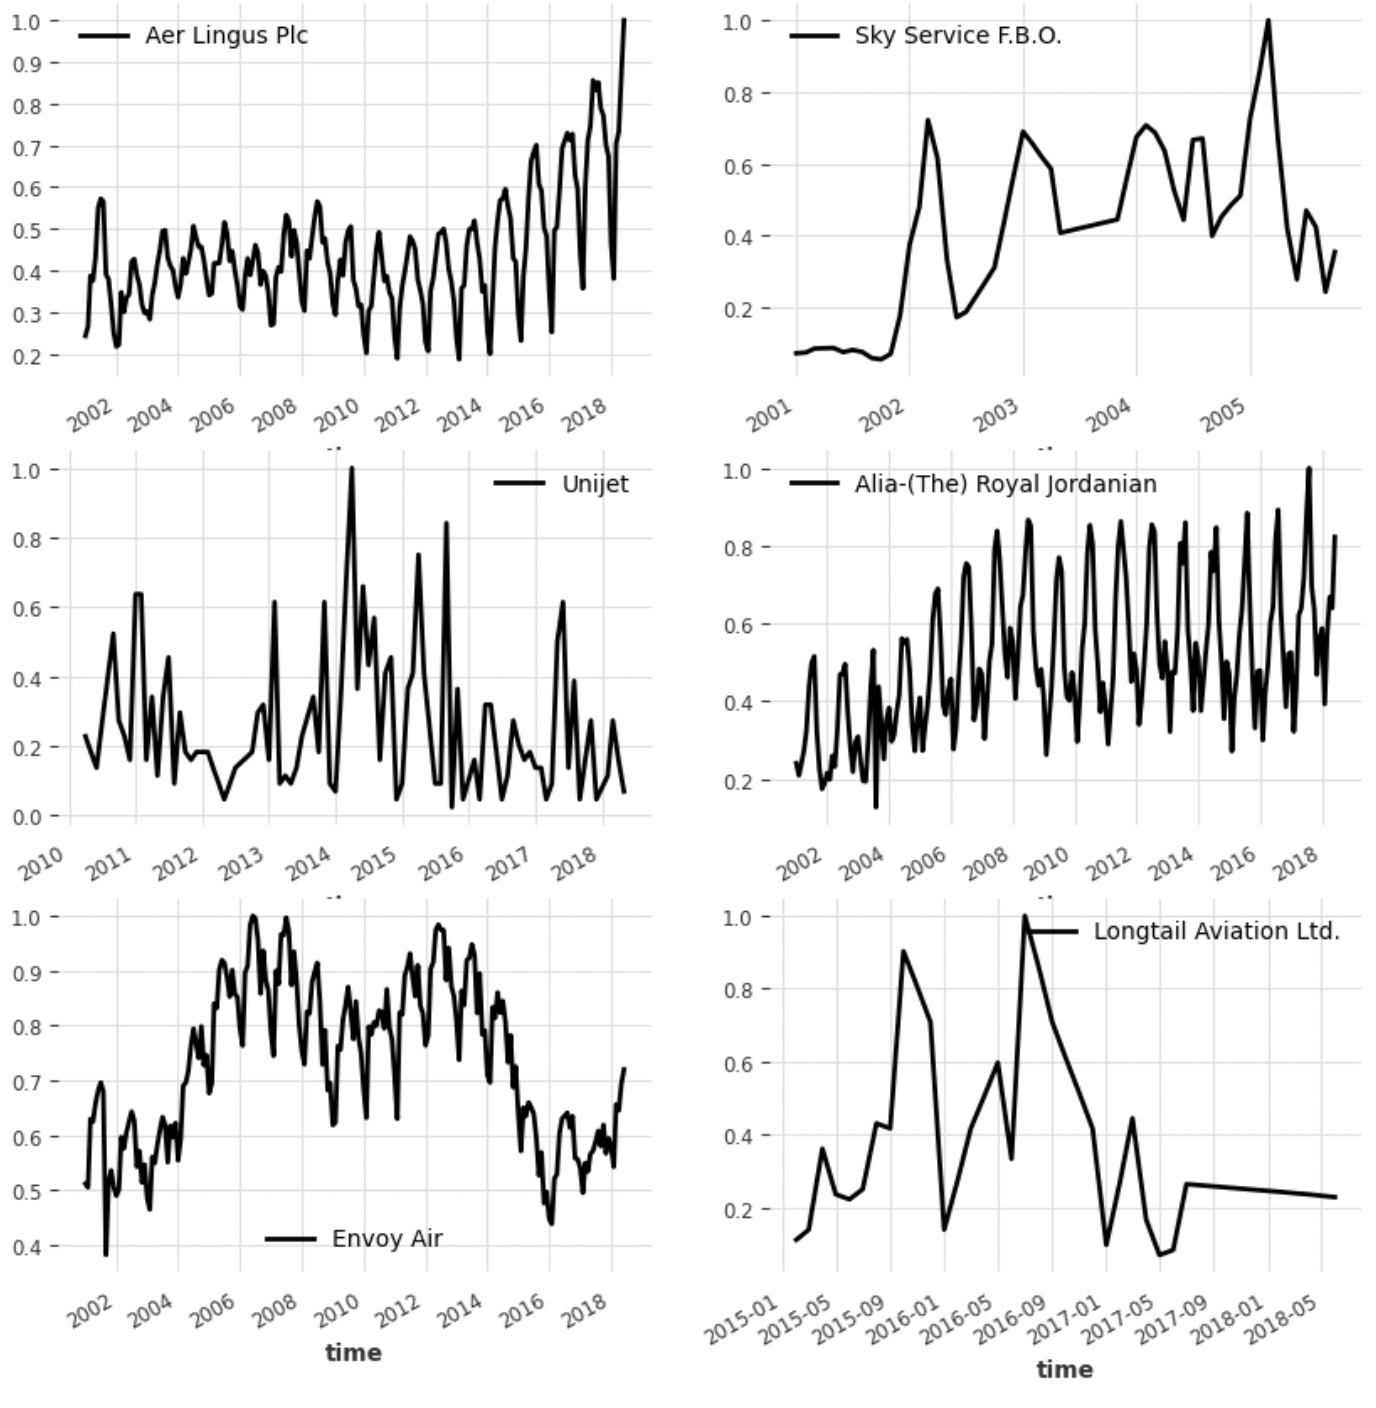

- x축 범위도 공유하지 않으며, 시리즈 모양도 상당히 다름

---

> ### *Predicting Air Passengers with Local Models*

    기존의 classical한 모델(e.g. Exponential Smoothing or ARIMA) 사용하여 각각의 시계열에서 모델을 fitting 해보자
    (이때 이 모델을 local models라고 칭하는 것 같음)
    
    먼저, 두 함수를 정의한다.
    
    첫째, eval_forecasts() 함수 : 해당 local models가 도출해낸 예측값의 sMAPE error 중앙값을 계산하고 이 error의 분포를 보여주는 함수
    둘째, eval_local_model() 함수 : 모든 시리즈들을 iterate, 그리고 각각의 시리즈들에 대해 local model을 build. 그 후 예측값들을 저장.
      - 그 후에, 첫째 함수인 eval_forecasts()를 호출하고 모든 시리즈들에 대한 sMAPE errors들을 plot으로 확인가능

---

> ### *Getting Some Forecasts*

    1) 첫 번째 naive model
    훈련 시리즈의 마지막 값을 맹목적으로 반복하는 naive한 모델
    (??? 여기서 말하는 마지막 값을 맹목적으로 반복한다는 것은 무엇을 의미할까 ???)
    > 이때 sMAPE는 29.422
    
    2) 1번과 동일한 모델 사용, 하지만 파라미터 K값을 12로 변경하여 모델 생성
    대부분의 월별로 시리즈가 12의 계절성을 띈다는 것을 활용하여 덜 naive한 모델을 생성해보자
    (이때, eval_local_model을 활용하여 K=12라는 파라미터값을 조정하여 대개 월별 시리즈가 계절성이 12 띄는 것을 활용했음)
    > 이때 sMAPE는 25.829
    
    3) ExponentialSmoothing을 통해 예측한 결과
    해당 모델은 default로 월별 시리즈에 한해서 12의 계절성을 사용함
    > 이때 sMAPE는 23.401
    
    4) Theta 모델을 이용
    > 이때 sMAPE는 22.915
    
    5) ARIMA 모델 이용
    > 이때 sMAPE는 21.818

### Mid Summary

    - 모델을 변경하여 생성할수록 sMAPE값이 계속 낮아지는 것을 확인할 수 있음
    
    ******************************************************************************************
    해당 경우들에 한해선 ARIMA 모델이 가장 우수한 결과를 냈음
    하지만 아래 그래프를 확인해보면 모델 학습 경과 시간은 ARIMA가 가장 오래 걸렸음
    ******************************************************************************************    
    오히려 Theta 모델이 tradeoff 관점에서 제일 적합해보임
    예측도 ARIMA에 비해 크게 뒤지지 않으며 시간은 50배 빨랐음
    ******************************************************************************************
    
     Can we maybe find a better compromise by considering global models — i.e., models that are trained only once, jointly on all time series?
     모든 시계열에 대해 한 번만 학습된 모델들, 즉 전역 모델에서 더 나은 절충안을 찾을 수 있을까?
     즉, 좋은 전이학습 결과를 도출해낼 모델을 찾을 수 있을까?

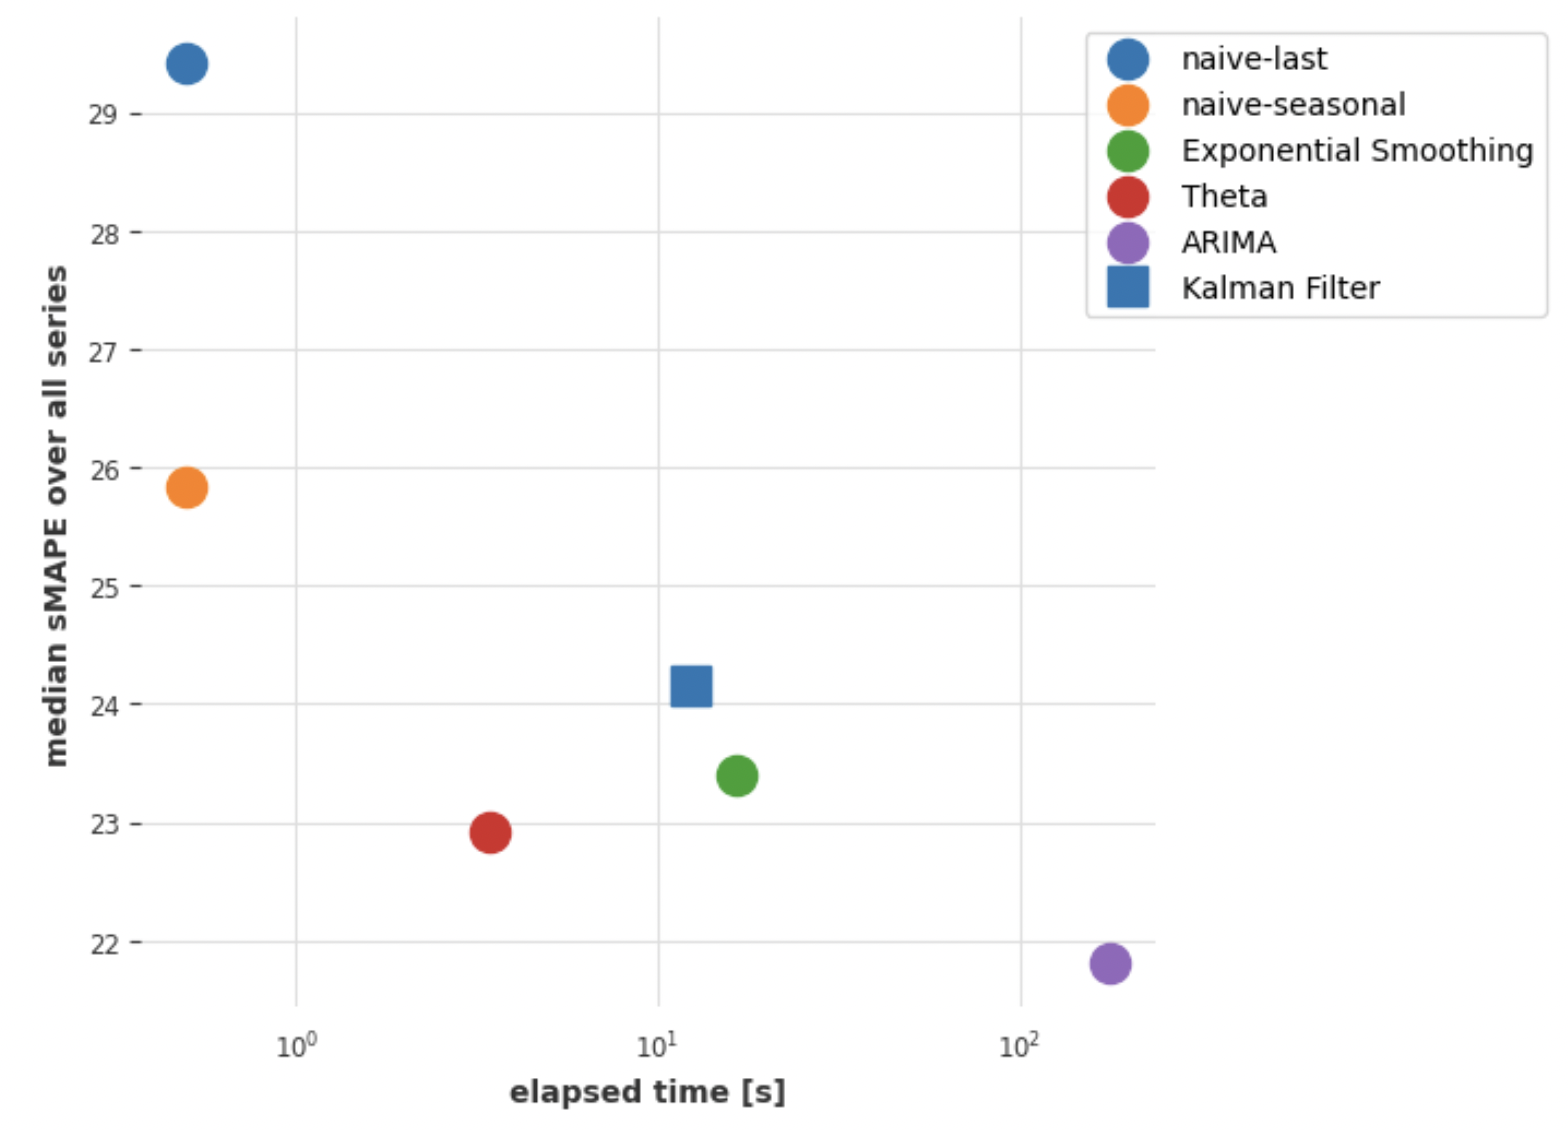

- 여기까진 Local Model !!

---

> ### Predicting Air Passengers with Global Models

    global 모델을 활용해보자
    즉 어떤 모델을 활용하겠다는 건가?
    ******************************************************************************************
    다양한 시계열에 대해 한 번만 학습된 모델을 사용해보자
    이걸 발전시켜 전이학습에 활용하겠다는 의미겠지?
    
    해당 칼럼에서는 Darts에 속해있는 두 종류의 global model을 활용!
    
    하나는 사이킷런의 wrapper를 활용
    나머지 하나는 PyTorch 기반의 모델을 활용
    ******************************************************************************************
    
    Both models can be trained on multiple series by “tabularizing” the data — i.e., taking many (input, output) sub-slices from all the training series, and training machine learning models in a supervised fashion to predict the output based on the input.
    두 모델 모두 데이터를 표 형식화하여 여러 시리즈에 대해 훈련할 수 있다. 
    
    위에서 정의했던 eval_local_model과 유사한 eval_global_model이라는 이름의 function을 정의해보자

### Using RegressionModel's
딥러닝 모델과는 달리 global model로 가기에 좋음

왜? 많은 하이퍼 파라미터를 갖고 있지 않기 때문에, 좀 더 빠른 속도로 학습이 가능함

### Let's try linear regression

```python
lr_smapes, lr_time = eval_global_model(air_train, air_test, LinearRegressionModel, lags=30, output_chunk_length=1)
```

이때, 파라미터 lags , output_chunk_length는 각각 훈련에 사용되는 입력/출력 하위 슬라이스의 길이에 해당

예를 들어, 현재 lags가 30 그리고 output_chunk)length가 1인데 이는 다음을 의미함

- 모델이 과거의 30 lags를 소비하여 다음의 1을 예측한다는 것.


> Mid Summary

    1) LinearRegressionModel
    
    sMAPE = 22.023
    
    2) LGBM
    
    sMAPE = 23.220
    
    3) RandomForest
    
    sMAPE = 23.606

---

> ### Using Deep Learning

    